In [42]:
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action = 'ignore', category = FutureWarning)

#import graphing

# import mglearn

In [43]:
Train = pd.read_csv('Train.csv', index_col=0, na_values='na')
print(f'The DataFrame has {len(Train)} rows and {Train.shape[1]} columns.')
Train.head(3)

The DataFrame has 18506 rows and 20 columns.


,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
Tour_ID,,,,,,,,,,,,,,,,,,,,
tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,Yes,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,No,6,6,Yes,Higher Cost


In [44]:
Test = pd.read_csv('Test.csv', index_col=0, na_values='na')
print(f'The DataFrame has {len(Test)} rows and {Test.shape[1]} columns.')


The DataFrame has 6169 rows and 19 columns.


In [45]:
#List the columns for different datatypes:
print('List of all Columns: ')
print(Train.columns)
print('\n')
print('Integer Type: ')
Col_int = Train.select_dtypes(np.int64).columns
print(Col_int)
print('\n')
print('Float Type: ')
Col_float = Train.select_dtypes(np.float64).columns
print(Col_float)
print('\n')
print('Object Type: ')
Col_cat = Train.select_dtypes(object).columns
print(Col_cat)
print('\n')
print('Count:')
print(Train.dtypes.value_counts())

List of all Columns: 
Index(['country', 'age_group', 'travel_with', 'total_female', 'total_male',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar',
       'first_trip_tz', 'cost_category'],
      dtype='object')


Integer Type: 
Index(['night_mainland', 'night_zanzibar'], dtype='object')


Float Type: 
Index(['total_female', 'total_male'], dtype='object')


Object Type: 
Index(['country', 'age_group', 'travel_with', 'purpose', 'main_activity',
       'info_source', 'tour_arrangement', 'package_transport_int',
       'package_accomodation', 'package_food', 'package_transport_tz',
       'package_sightseeing', 'package_guided_tour', 'package_insurance',
       'first_trip_tz', 'cost_category'],
      dtype='object')


Count:
object     16
float64     2
int64 

# Get summary statistics for categorical variables:


In [46]:
Train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_female,18504.0,0.936230,1.215582,0.0,0.0,1.0,1.0,49.0
total_male,18500.0,0.998757,1.173177,0.0,1.0,1.0,1.0,58.0
night_mainland,18506.0,9.141576,14.127449,0.0,3.0,6.0,11.0,365.0
night_zanzibar,18506.0,2.493516,5.275156,0.0,0.0,0.0,4.0,240.0


In [47]:
# Let take a look at the Object Type

Train.describe(include='object').transpose()

,count,unique,top,freq
country,18506,131,UNITED STATES OF AMERICA,2846
age_group,18506,5,25-44,9047
travel_with,17431,5,Alone,7590
purpose,18506,8,Leisure and Holidays,11755
main_activity,18506,10,Widlife Tourism,5988
info_source,18506,8,"Travel agent, tour operator",8005
tour_arrangement,18506,2,Package Tour,9295
package_transport_int,18506,2,No,12238
package_accomodation,18506,2,No,9541
package_food,18506,2,No,10143


# Visualisation

---

The majority of the visitors under the age group of 25-44 came for business (18.5%), or leisure and holidays (53.2%), which is consistent with the fact that they are economically more productive. Those at the age group of 45-64 were more prominent in holiday making and visiting friends and relatives. The results further reveal that most visitors belonging to the age group of 18-24 came for leisure and holidays (55.3%) as well as volunteering (13.7%). The majority of senior citizens (65 and above) came for leisure and holidays (80.9%) and visiting friends and relatives (9.5%).

# Let Varify that

---


Age Distribution

<!-- # plt.figure(1) 
# plt.subplot(221)
# Train['Building_Fenced'].value_counts().plot.bar(title='Building Fenced')
# plt.subplot(222)
# Train['Building_Painted'].value_counts().plot.bar(title='Building Painted')
# plt.subplot(223)
# Train['Garden'].value_counts().plot.bar(title='Garden')
# plt.subplot(224)
# Train['Settlement'].value_counts().plot.bar(title='Settlement')


# plt.show() -->


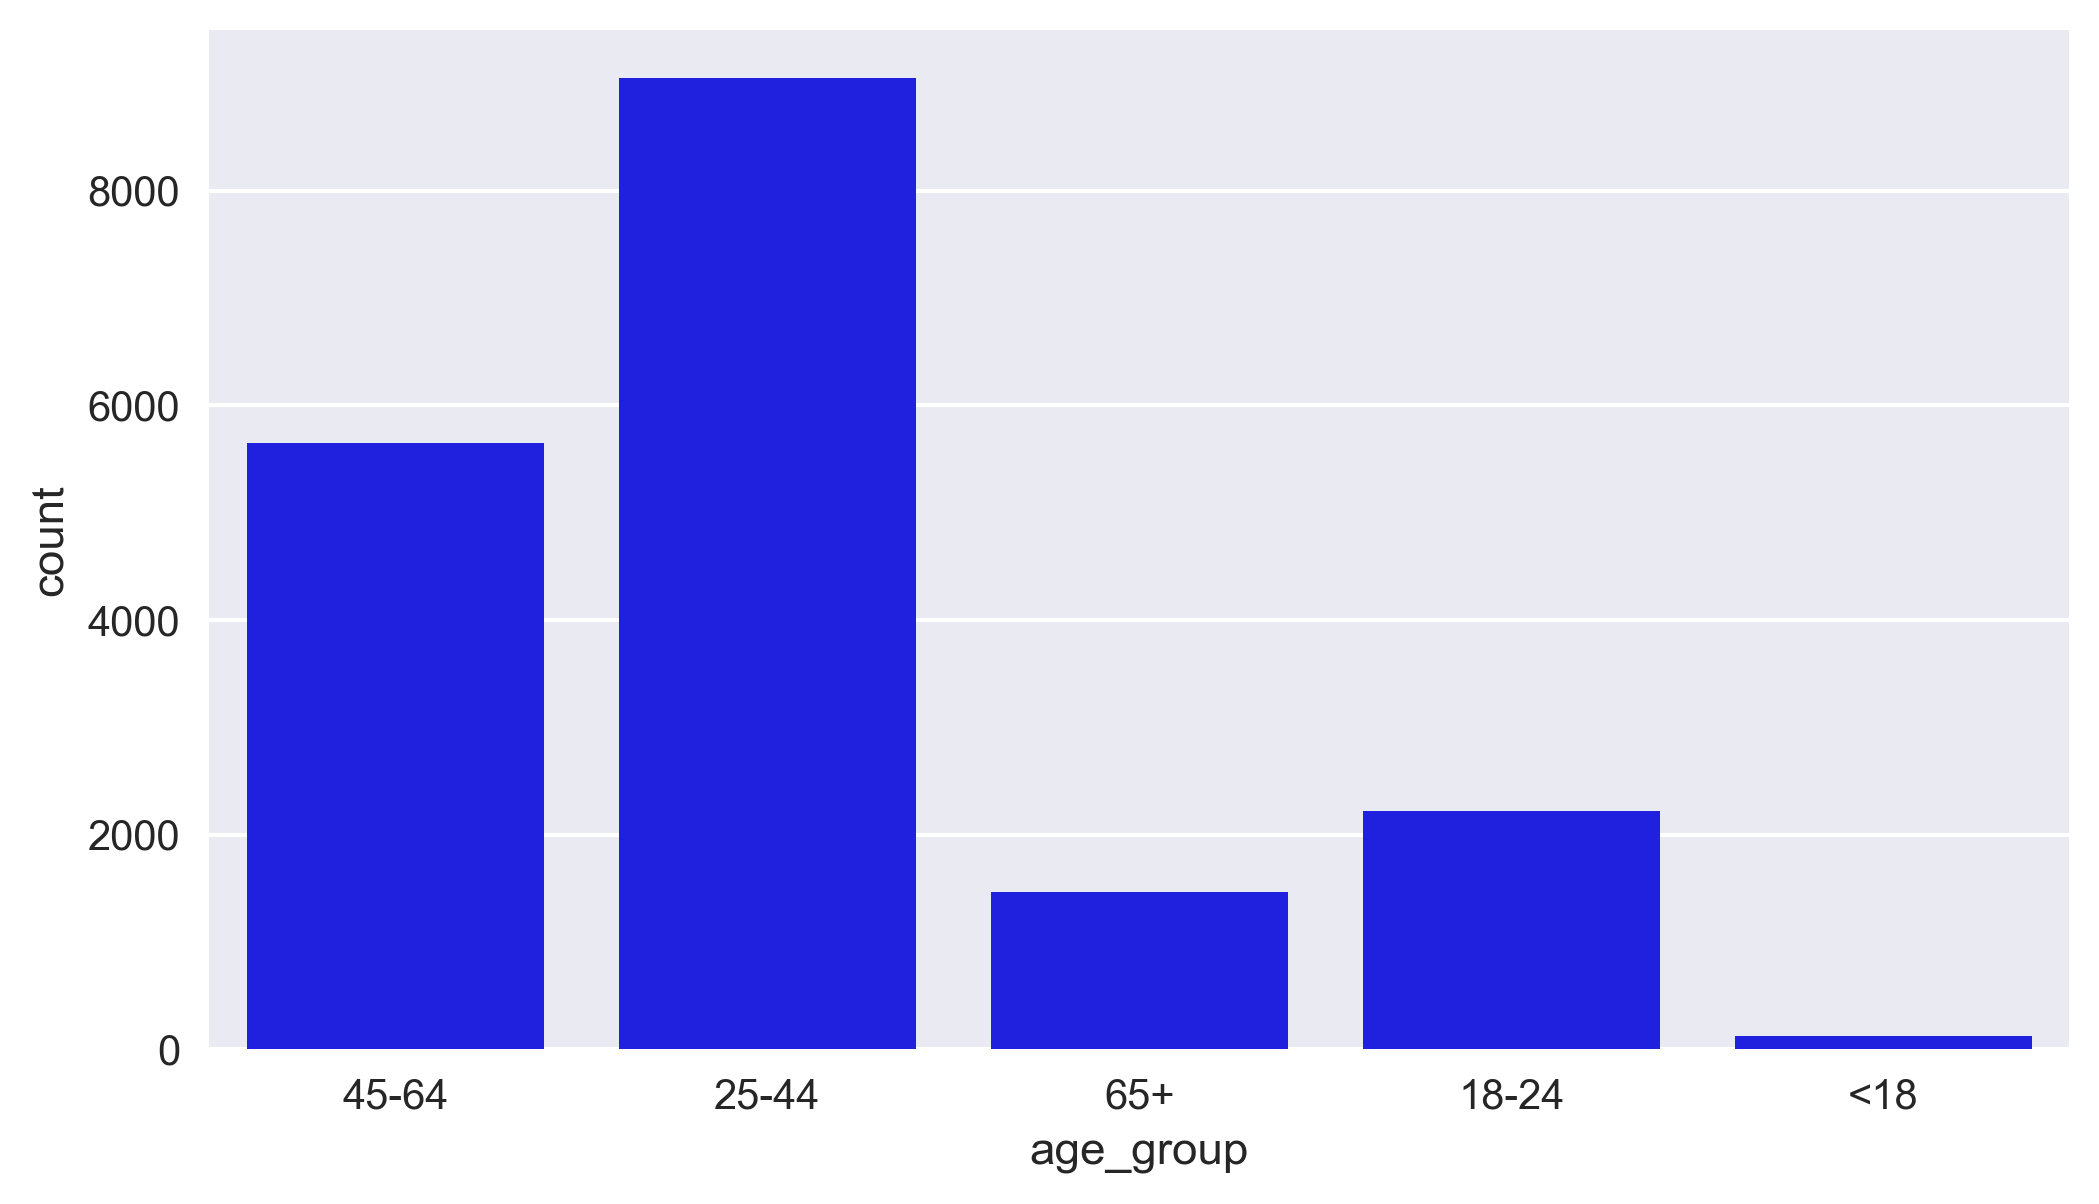

In [48]:
plot_ = sns.countplot(x=Train.age_group.dropna(), color='blue')

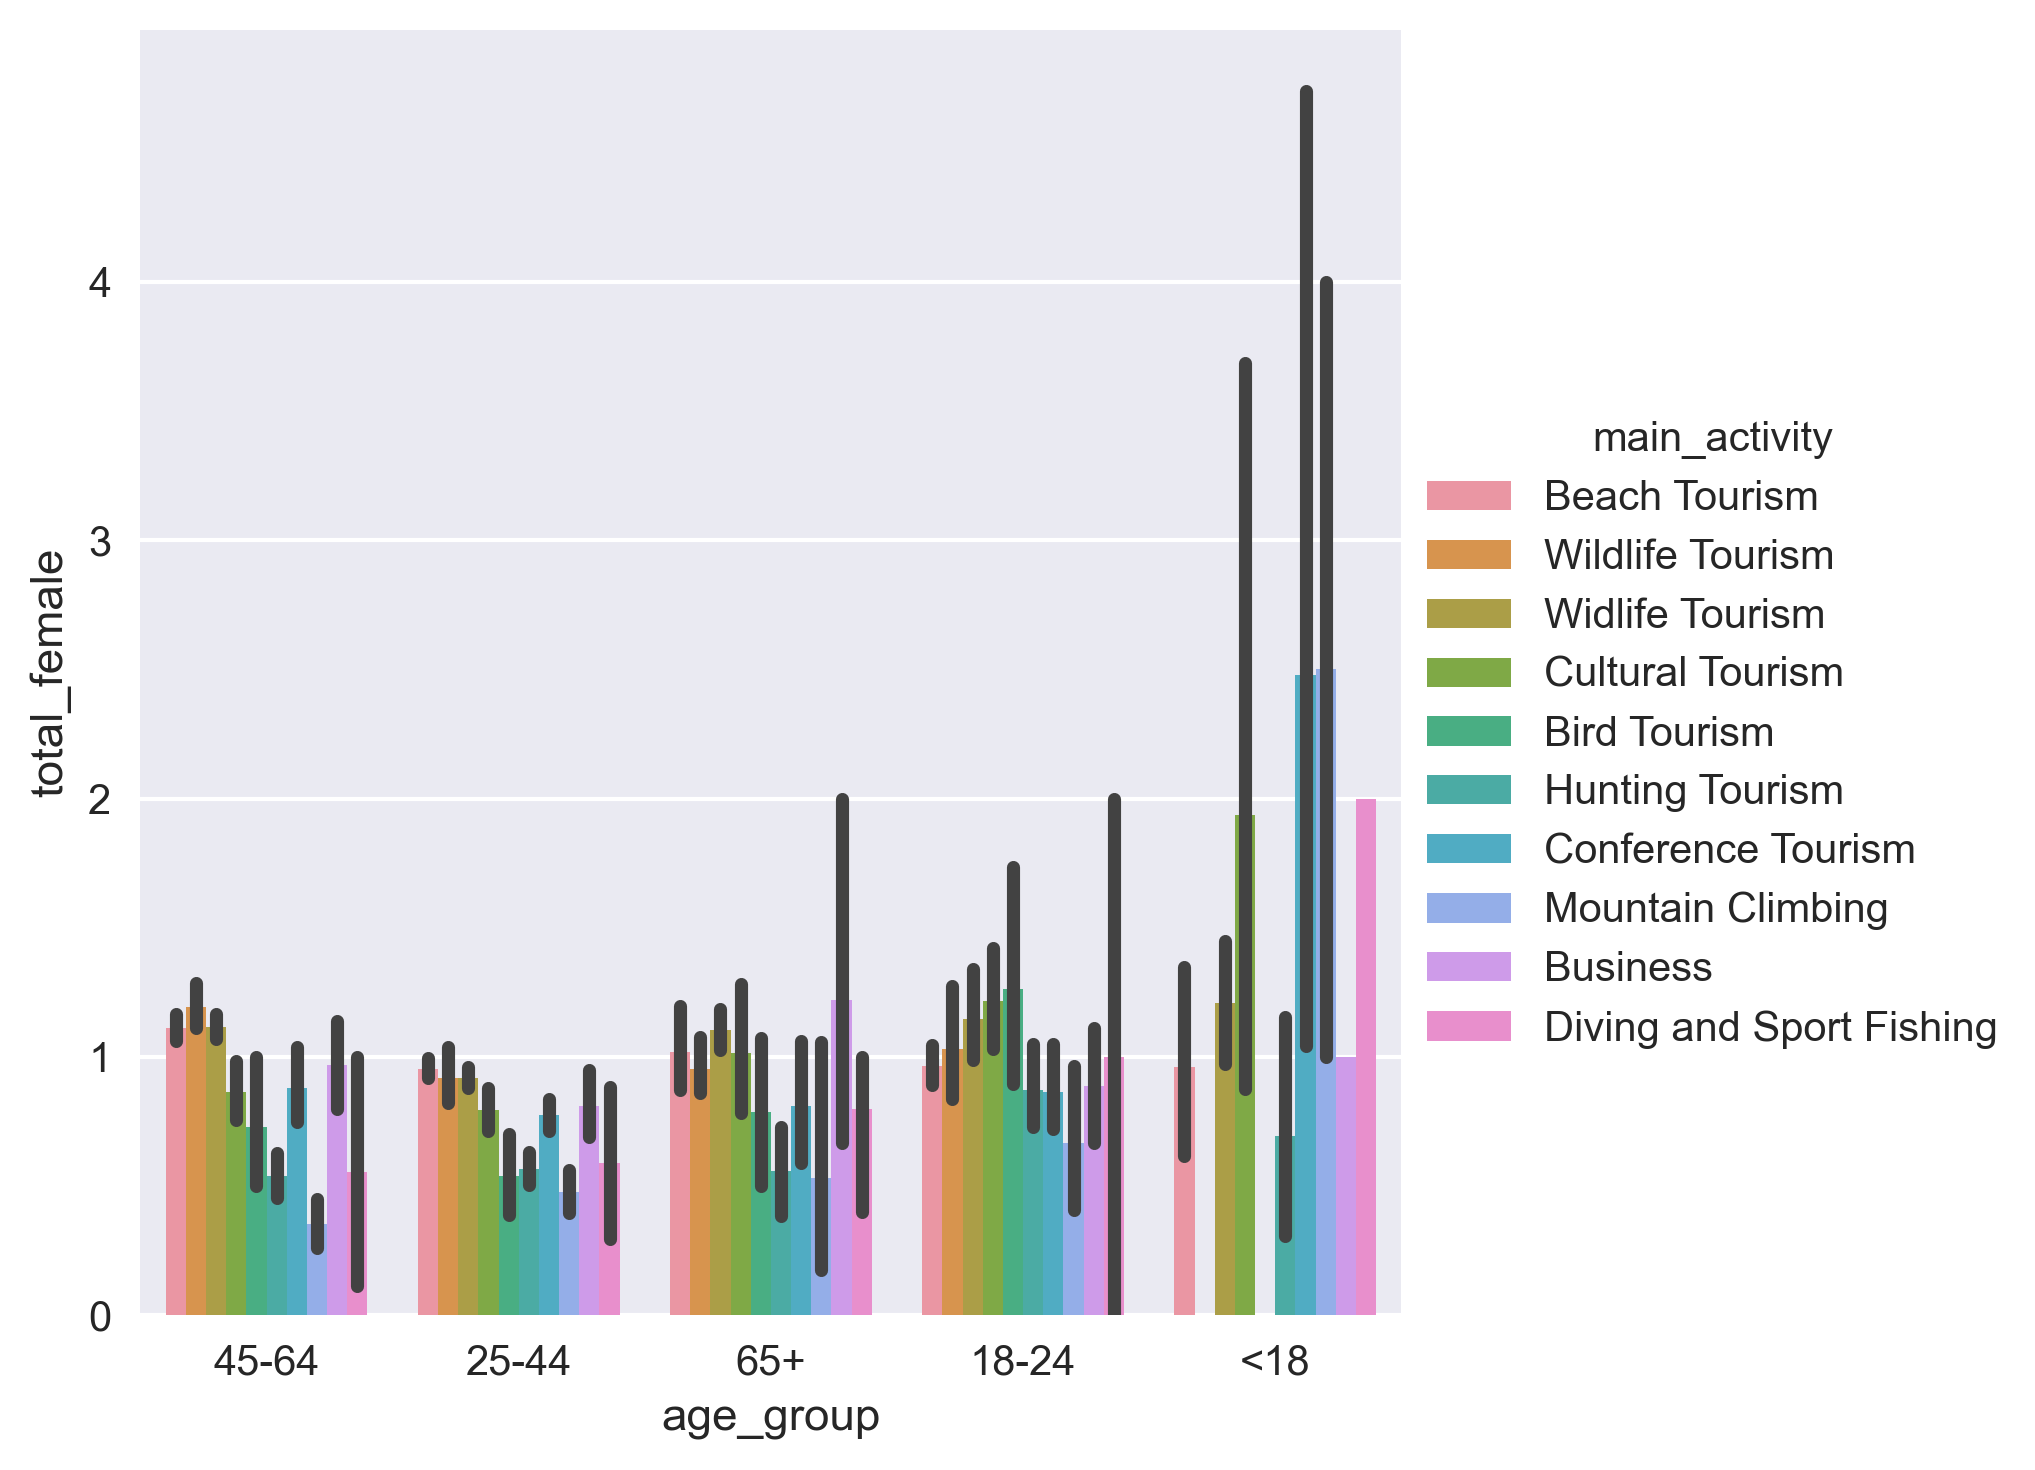

In [49]:
sns.catplot(x="age_group", y="total_female", hue="main_activity", kind="bar", data=Train)


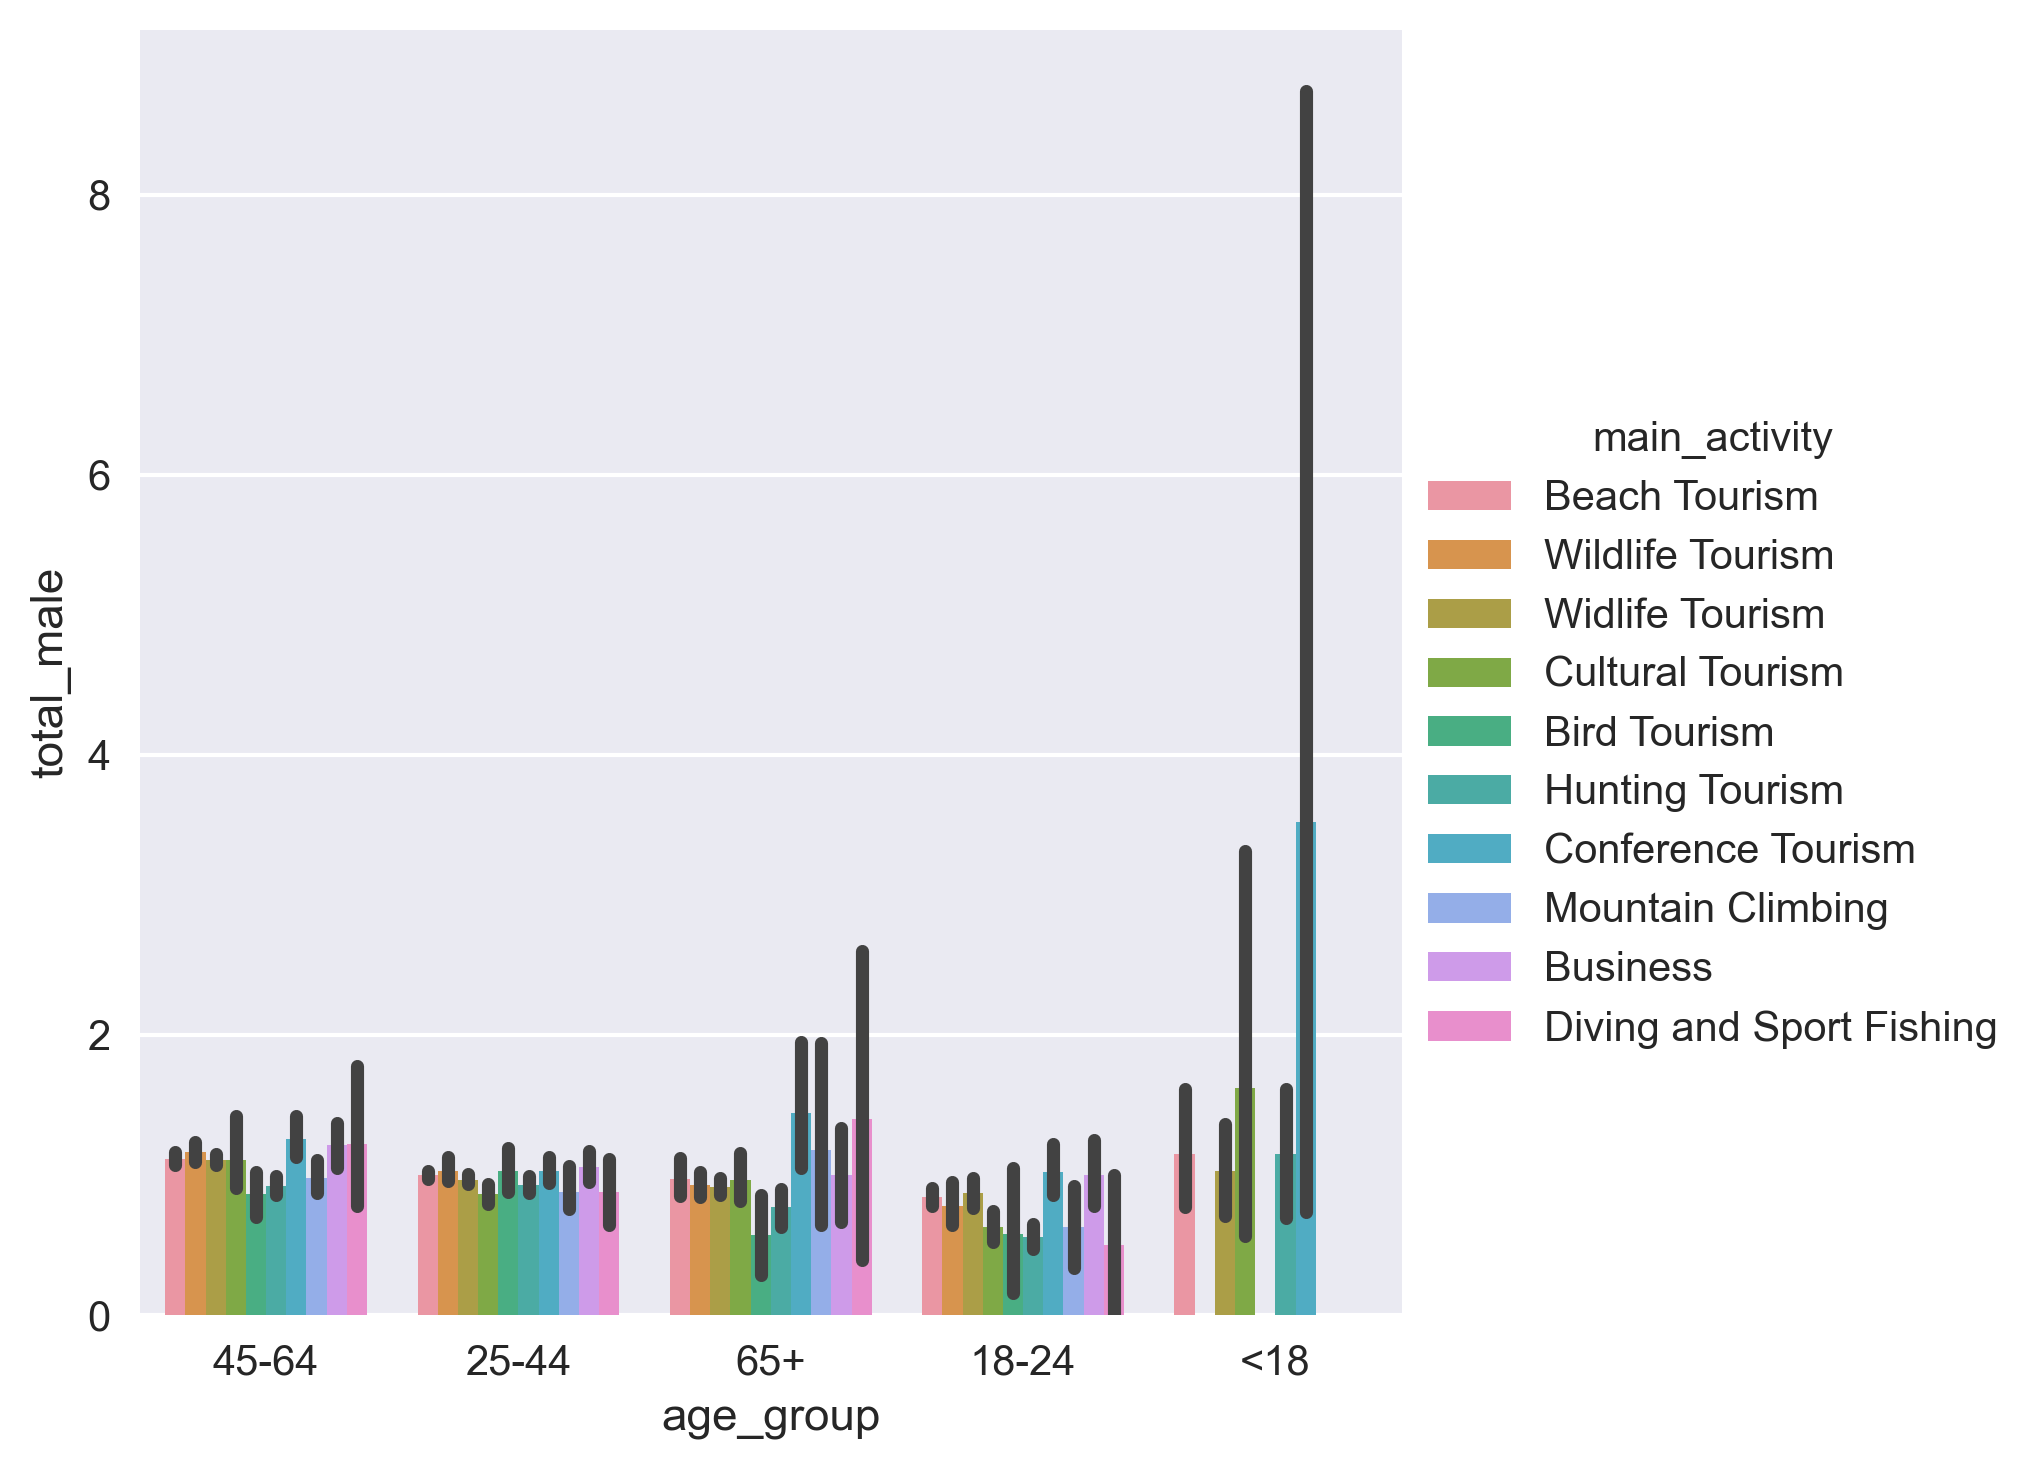

In [50]:

sns.catplot(x="age_group", y="total_male", hue="main_activity", kind="bar", data=Train)

In [51]:
Train.describe(include='object').transpose()

,count,unique,top,freq
country,18506,131,UNITED STATES OF AMERICA,2846
age_group,18506,5,25-44,9047
travel_with,17431,5,Alone,7590
purpose,18506,8,Leisure and Holidays,11755
main_activity,18506,10,Widlife Tourism,5988
info_source,18506,8,"Travel agent, tour operator",8005
tour_arrangement,18506,2,Package Tour,9295
package_transport_int,18506,2,No,12238
package_accomodation,18506,2,No,9541
package_food,18506,2,No,10143


# Dealing with missing values && Preparing Data
Count how many null values are existing in columns.

Clearn Data Remove null value.


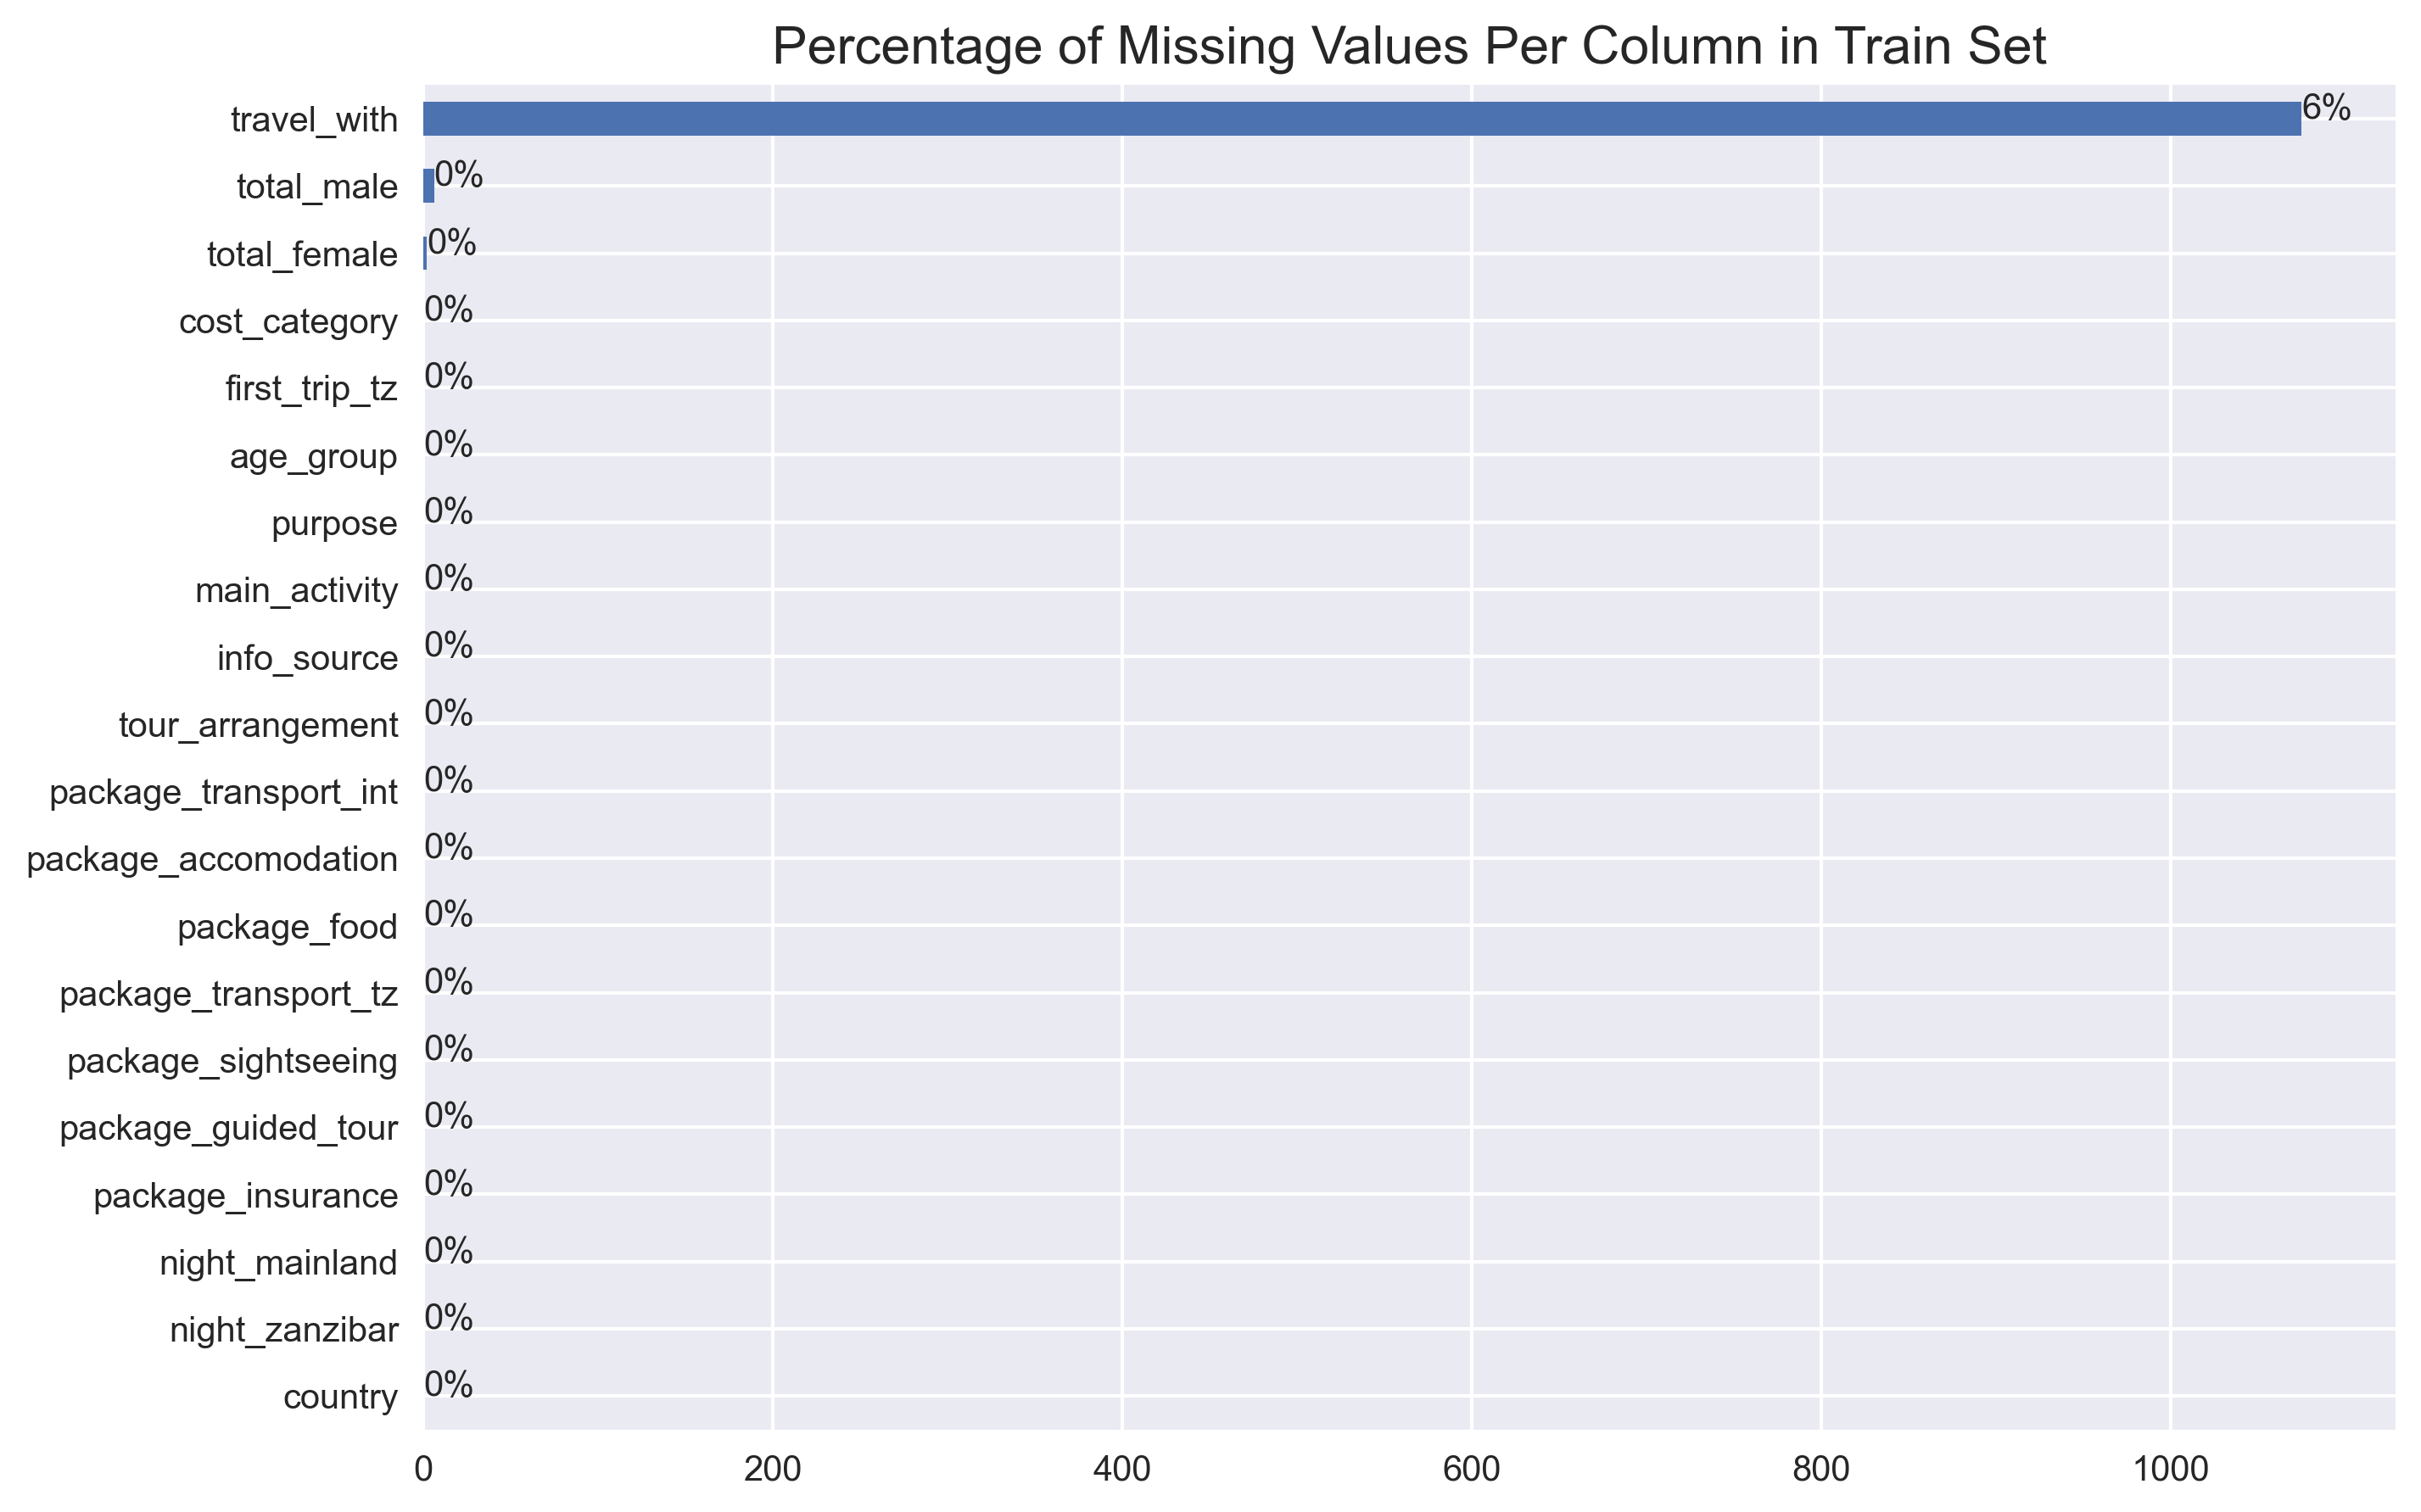

In [52]:
# Check if there any missing values in train set
ax = Train.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/Train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [53]:
CAT_FEATURES = ['country','age_group', 'travel_with', 'purpose', 'main_activity',
       'info_source', 'tour_arrangement', 'package_transport_int',
       'package_accomodation', 'package_food', 'package_transport_tz',
       'package_sightseeing', 'package_guided_tour', 'package_insurance',
       'first_trip_tz' ]

from sklearn.impute import SimpleImputer
for col in CAT_FEATURES:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer.fit(Train[[col]])
    Train.loc[:, col] = cat_imputer.transform(Train[[col]])
    Test.loc[:, col] = cat_imputer.transform(Test[[col]])

In [54]:
NUM_FEATURES = Train.select_dtypes('number')

for col in NUM_FEATURES:
    num_imputer = SimpleImputer(strategy='median')
    num_imputer.fit(Train[[col]])
    Train.loc[:, col] = num_imputer.transform(Train[[col]])
    Test.loc[:, col] = num_imputer.transform(Test[[col]])

Missing values in Travel With

In [55]:
# Dealing with missing values in Travel With Column
def Clean(cols):
    travel_with =cols[0]
    total_female =cols[1]
    total_male =cols[2]
    if pd.isnull(travel_with):
        
        if total_female+total_male == 1:
            return "Alone"
        elif total_female+total_male <= 5:
            return "With Spouse and Children"
        elif total_female+total_male == 2:
            return "With Spouse "
        else:
            return "With Other Friend/Relative"
    else:
        return travel_with


Train['travel_with']=Train[['travel_with','total_female','total_male']].apply(Clean,axis=1)
Test['travel_with']=Test[['travel_with','total_female','total_male']].apply(Clean,axis=1)


    

In [56]:
Train.head(2)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
Tour_ID,,,,,,,,,,,,,,,,,,,,
tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,Yes,Yes,Yes,Yes,No,No,No,0.0,7.0,Yes,High Cost
tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,No,No,No,0.0,7.0,Yes,High Cost


In [57]:
encoding_dict = dict()
for col in Train.columns[1:]:
    if Train[col].dtype == 'O':
        #get unique values in the column to encode
        values = Train[col].value_counts().index.tolist()

        # create a dictionary of values and corresponding number {value, number}
        dict_values = {value: count for value, count in zip(values, range(1,len(values)+1))}

        # save the values to encode in the dictionary
        encoding_dict[col] = dict_values

        # replace the values with the corresponding number from the dictionary
        Train[col] = Train[col].map(lambda x: dict_values.get(x)) - 1
        if col != 'cost_category':
            Test[col] = Test[col].map(lambda x: dict_values.get(x)) - 1 
dict_values

{'Normal Cost': 1,
 'Higher Cost': 2,
 'High Cost': 3,
 'Lower Cost': 4,
 'Low Cost': 5,
 'Highest Cost': 6}

In [58]:
Train.head(2)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
Tour_ID,,,,,,,,,,,,,,,,,,,,
tour_id1hffseyw,ITALY,1,4,0.0,2.0,1,1,1,0,1,1,1,1,0,0,0,0.0,7.0,0,2
tour_idnacd7zag,UNITED KINGDOM,0,1,1.0,1.0,0,2,0,0,1,1,1,1,0,0,0,0.0,7.0,0,2


Feature Selection

<AxesSubplot:>

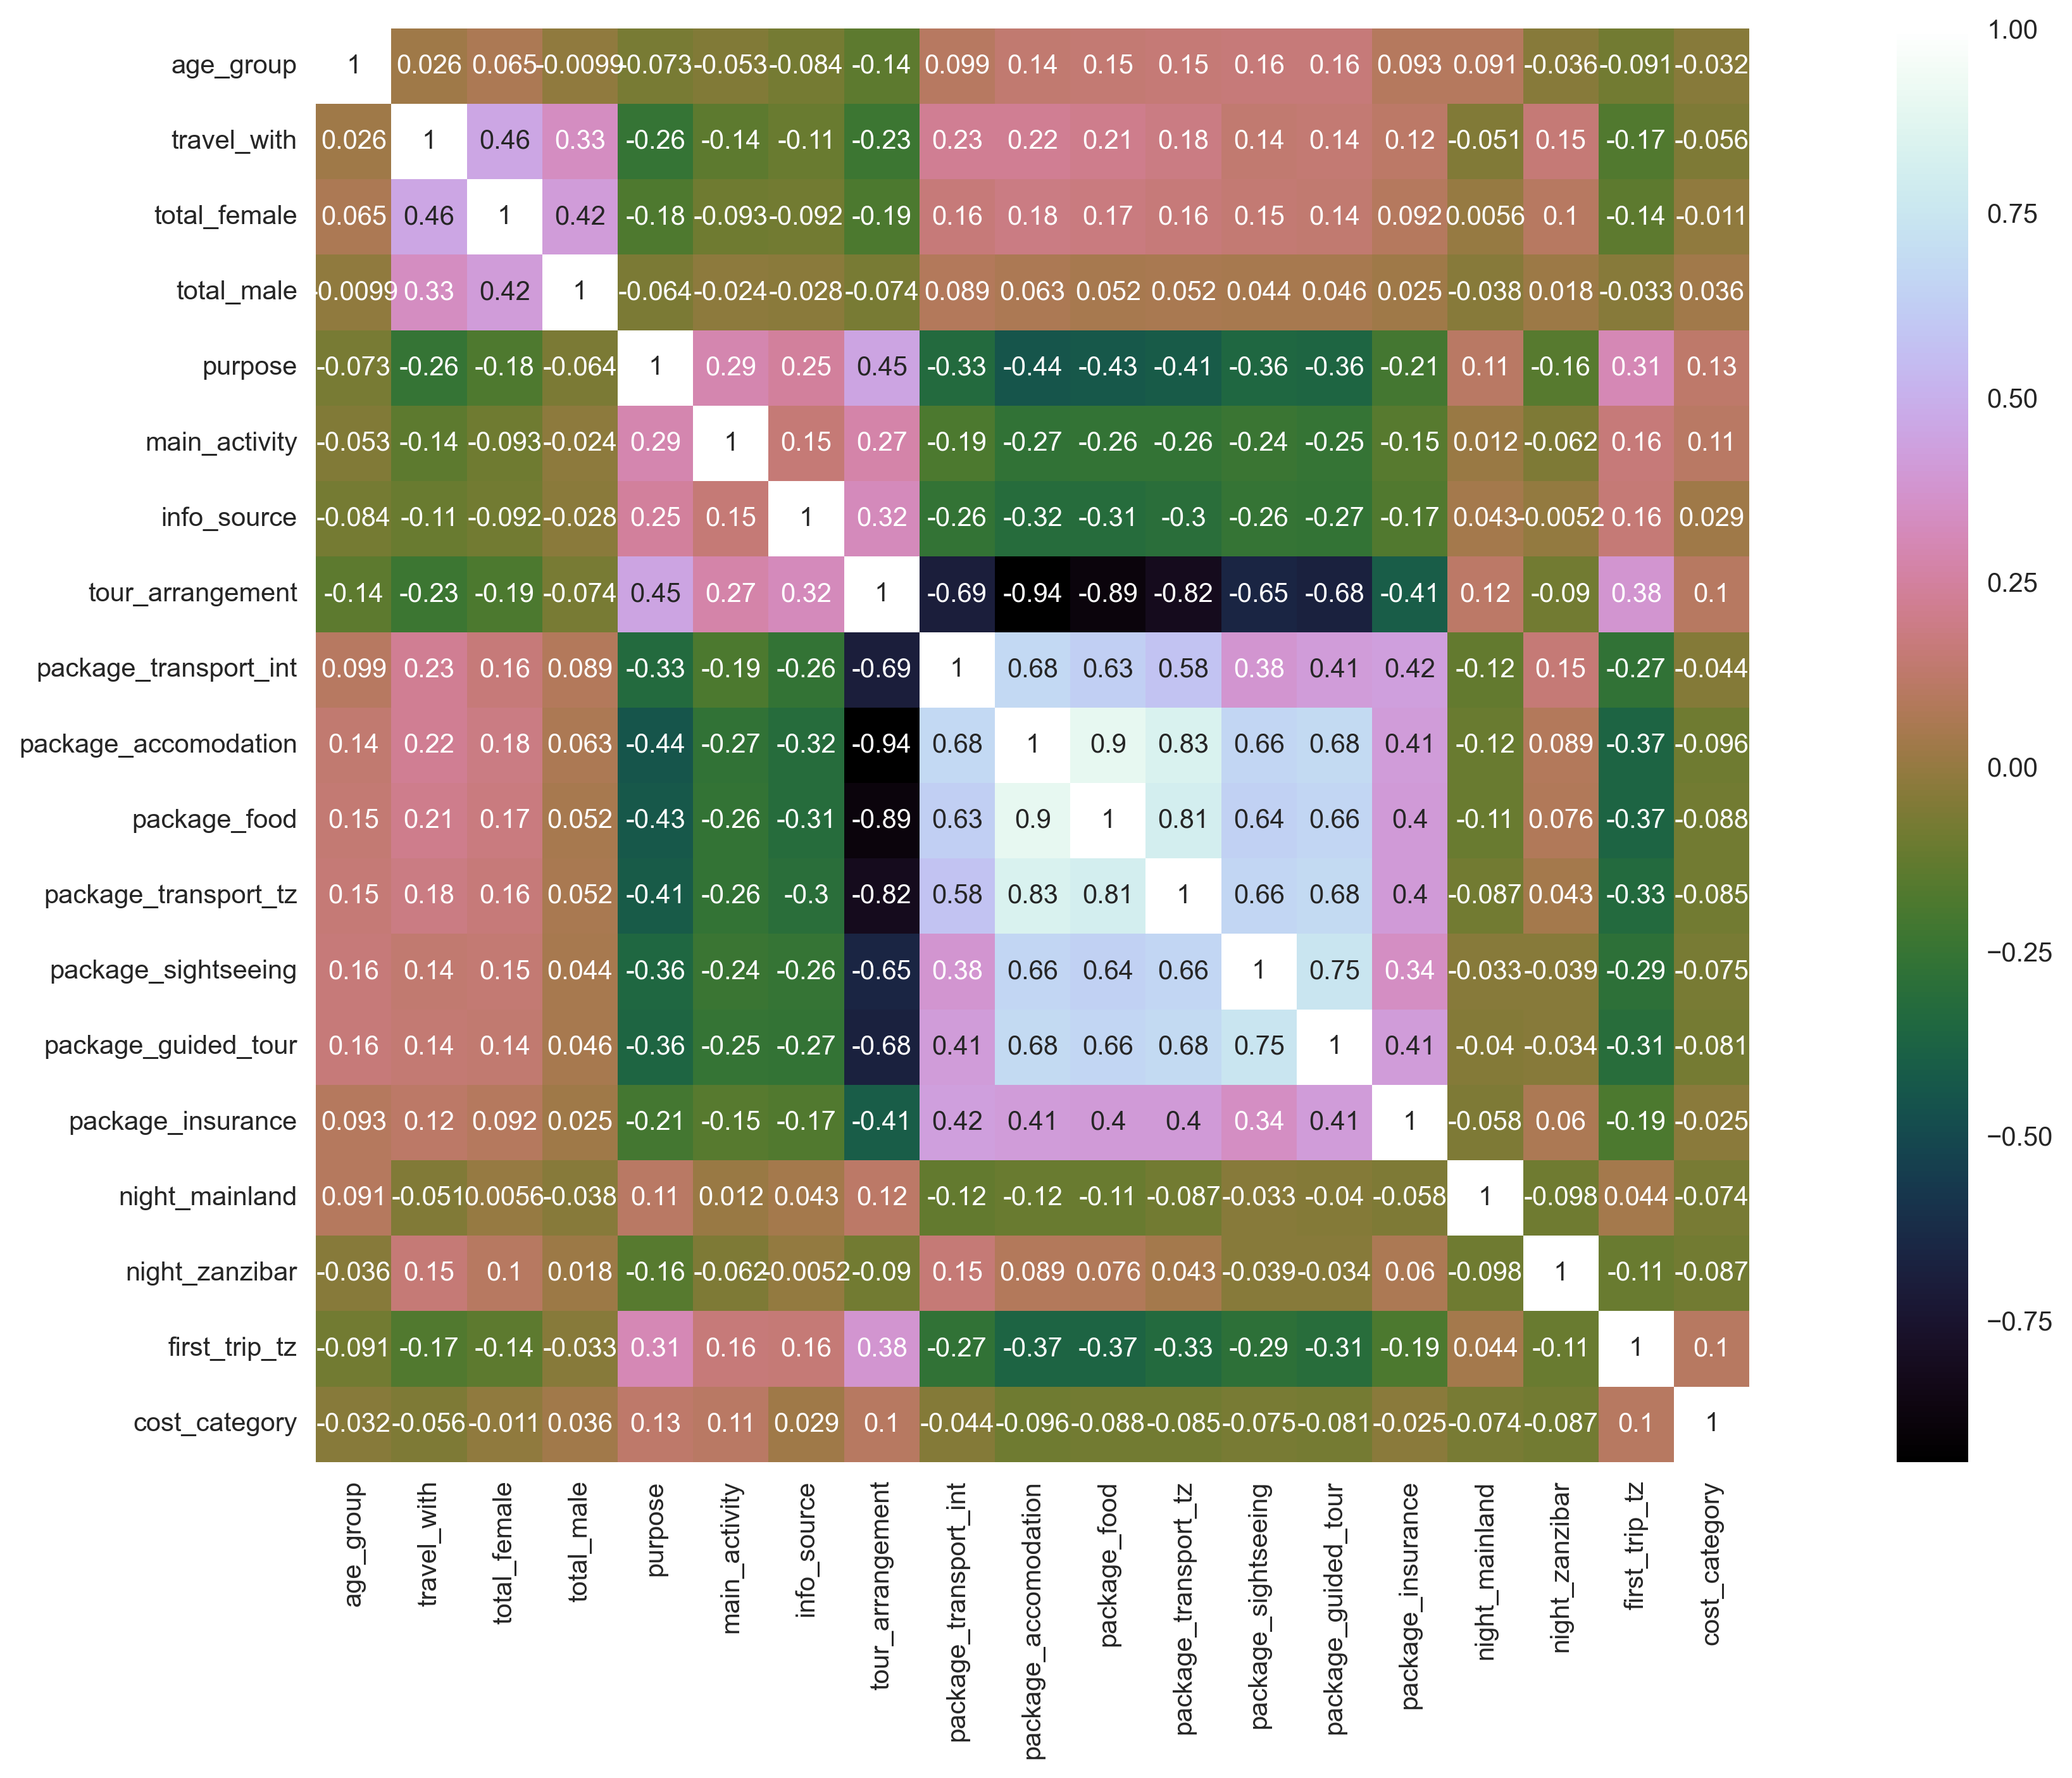

In [59]:
# GETTING Correllation matrix
corr_mat= Train.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [60]:
# def uncorrelated_features(df, threshold=0.95):
#     """
#     Returns a subset of df columns with Pearson correlations
#     below threshold.
#     """

#     corr = df.corr().abs()
#     keep = []
#     for i in range(len(corr.iloc[:,0])):
#         above = corr.iloc[:i,i]
#         if len(keep) > 0: above = above[keep]
#         if len(above[above < threshold]) == len(above):
#             keep.append(corr.columns.values[i])

#     return df[keep]

# Train = uncorrelated_features(df=X,threshold=0.95)
# Test = uncorrelated_features(df=Test,threshold=0.95)

In [61]:
X = Train.drop('cost_category', axis=1)  #independent columns without the index column
y = Train.cost_category
   

In [62]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# X = StandardScaler().fit_transform(X)

X_train, X_cv, y_train, y_cv = train_test_split(X, y ,test_size = 0.3)


In [63]:

from sklearn.metrics import accuracy_score
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb




'''
    Select the best model for the given dataset
    :param X: features
    :param Y: labels
    :return: the name and the accuracy of the model for the given dataset
    '''
    #,xgb.XGBClassifier()
models = xgb.XGBClassifier(tree_method="hist", enable_categorical=True, objective='multi:softprob')



models.fit(X_train, y_train)
ypred = models.predict(X_cv)
pred  = models.predict(Test)

(f'Meann Squared Error -: {mean_squared_error(y_cv,ypred)}')

ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:country

In [ ]:
pred

array([0, 1, 2, ..., 0, 0, 3], dtype=int64)

In [ ]:
from xgboost import XGBRegressor

ml = XGBRegressor(random_state=42, objective='multi:softprob', num_class=6)
ml.fit(X_train, y_train)
y_pred = ml.predict(X_cv)
Prediction  = ml.predict(Test)
print(mean_squared_error(y_cv, y_pred.argmax(axis=1), squared =False))

1.5242988656101166


In [ ]:
Prediction

array([[8.57254684e-01, 3.41271460e-02, 6.70062602e-02, 2.03422215e-02,
        2.12301165e-02, 3.96007126e-05],
       [1.71293631e-01, 6.18302524e-01, 1.56165853e-01, 1.48826838e-02,
        2.79736565e-03, 3.65579501e-02],
       [1.87017947e-01, 1.90080553e-01, 6.04059517e-01, 3.51966638e-03,
        1.30265299e-02, 2.29576742e-03],
       ...,
       [4.16931033e-01, 1.93783984e-01, 3.55148643e-01, 1.46050565e-02,
        1.88680477e-02, 6.63213141e-04],
       [5.84171712e-01, 1.89410076e-02, 8.67821202e-02, 9.85369906e-02,
        2.11548582e-01, 1.95938337e-05],
       [2.95677066e-01, 3.91382957e-03, 1.80381071e-02, 4.34255183e-01,
        2.48101234e-01, 1.45779013e-05]], dtype=float32)

In [ ]:
Prediction.shape

(6169, 6)

In [ ]:
SampleSubmission = pd.read_csv('SampleSubmission.csv')
SampleSubmission.head()

,Tour_ID,High Cost,Higher Cost,Highest Cost,Low Cost,Lower Cost,Normal Cost
0,tour_idynufedne,0.23,0.56,0.04,0.12,0.005,0.12
1,tour_id9r3y5moe,NaN,NaN,NaN,NaN,NaN,NaN
2,tour_idf6itml6g,NaN,NaN,NaN,NaN,NaN,NaN
3,tour_id99u4znru,NaN,NaN,NaN,NaN,NaN,NaN
4,tour_idj4i9urbx,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Prediction1 = Prediction[:, 0]
Prediction2 = Prediction[:, 1]
Prediction3 = Prediction[:, 2]
Prediction4 = Prediction[:, 3]
Prediction5 = Prediction[:, 4]
Prediction6 = Prediction[:, 5]

In [ ]:
SampleSubmission['Normal Cost']  = Prediction1
SampleSubmission['Higher Cost']  = Prediction2
SampleSubmission['High Cost']    = Prediction3
SampleSubmission['Lower Cost']   = Prediction4
SampleSubmission['Low Cost']     = Prediction5
SampleSubmission['Highest Cost'] =  Prediction6
SampleSubmission.to_csv('My_Submission.csv', index=False)

SampleSubmission.head()

,Tour_ID,High Cost,Higher Cost,Highest Cost,Low Cost,Lower Cost,Normal Cost
0,tour_idynufedne,0.067006,0.034127,0.000040,0.021230,0.020342,0.857255
1,tour_id9r3y5moe,0.156166,0.618303,0.036558,0.002797,0.014883,0.171294
2,tour_idf6itml6g,0.604060,0.190081,0.002296,0.013027,0.003520,0.187018
3,tour_id99u4znru,0.020677,0.033094,0.000033,0.428761,0.061216,0.456220
4,tour_idj4i9urbx,0.031589,0.008825,0.000053,0.192133,0.296455,0.470945
